In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso ,LassoCV,Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.pipeline import make_pipeline

In [3]:
book_df = pd.read_excel('GoodReads_Awards_Dataset.xlsx')
prices_df = pd.read_excel('book_prices_.xlsx')

### Connecting the Price dataset with the corresponding ISBN 

In [4]:
book_df['Price'] = prices_df['Price']
book_df.head()

,Title,Author,ISBN,Year,Pages,No of Rating,Avg Rating,Added by,Liked by,Reviews,Votes,Genre,Year of nomination,Price
0,And the Mountains Echoed,Khaled Hosseini,159463176X,2013,404,331300,4.05,655406,0.95,29506,24686,Fiction,2013,SAR 48.93
1,The Storyteller,Jodi Picoult,1439102767,2013,461,188749,4.25,358108,0.96,17458,21269,Fiction,2013,SAR 241.336206896552
2,Me Before You,Jojo Moyes,0670026603,2012,369,1300820,4.25,2124123,0.95,86168,19656,Fiction,2013,SAR 168.4125
3,The Goldfinch,Donna Tartt,0316055433,2013,881,791855,3.92,1534752,0.89,65185,9313,Fiction,2013,SAR 83.55
4,The Husband's Secret,Liane Moriarty,0399159347,2013,396,578835,3.95,917935,0.94,37655,8715,Fiction,2013,SAR 78.675


In [5]:
#Removing the SAR from the price 
book_df['Price'] = book_df['Price'].str.replace('SAR ','')
book_df.head()

,Title,Author,ISBN,Year,Pages,No of Rating,Avg Rating,Added by,Liked by,Reviews,Votes,Genre,Year of nomination,Price
0,And the Mountains Echoed,Khaled Hosseini,159463176X,2013,404,331300,4.05,655406,0.95,29506,24686,Fiction,2013,48.93
1,The Storyteller,Jodi Picoult,1439102767,2013,461,188749,4.25,358108,0.96,17458,21269,Fiction,2013,241.336206896552
2,Me Before You,Jojo Moyes,0670026603,2012,369,1300820,4.25,2124123,0.95,86168,19656,Fiction,2013,168.4125
3,The Goldfinch,Donna Tartt,0316055433,2013,881,791855,3.92,1534752,0.89,65185,9313,Fiction,2013,83.55
4,The Husband's Secret,Liane Moriarty,0399159347,2013,396,578835,3.95,917935,0.94,37655,8715,Fiction,2013,78.675


In [6]:
# Renaming the columns
book_df.columns = [column.strip() for column in book_df.columns]
book_df.columns

Index(['Title', 'Author', 'ISBN', 'Year', 'Pages', 'No of Rating',
       'Avg Rating', 'Added by', 'Liked by', 'Reviews', 'Votes', 'Genre',
       'Year of nomination', 'Price'],
      dtype='object')

### Check the data types before exploring 
Price type is an object

In [7]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               2980 non-null   object 
 1   Author              2980 non-null   object 
 2   ISBN                2980 non-null   object 
 3   Year                2980 non-null   object 
 4   Pages               2980 non-null   int64  
 5   No of Rating        2980 non-null   int64  
 6   Avg Rating          2980 non-null   float64
 7   Added by            2980 non-null   int64  
 8   Liked by            2980 non-null   float64
 9   Reviews             2980 non-null   int64  
 10  Votes               2980 non-null   int64  
 11  Genre               2980 non-null   object 
 12  Year of nomination  2980 non-null   int64  
 13  Price               2188 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 326.1+ KB


So lets change it to numeric using the pandas to_numeric function 

In [8]:
book_df['Price'] = pd.to_numeric(book_df['Price'])
book_df.dtypes

Title                  object
Author                 object
ISBN                   object
Year                   object
Pages                   int64
No of Rating            int64
Avg Rating            float64
Added by                int64
Liked by              float64
Reviews                 int64
Votes                   int64
Genre                  object
Year of nomination      int64
Price                 float64
dtype: object

Now it is float. But we have nulls in the price due to some reason like, the ISBN in good reads was not found in the Bookfinder or these books are not availavbe on sale anymore. So, to deal with this lets take the mean price and replace each year's null prices with it, it is a away for handling missing values.

In [9]:
year_2013_price_cleaning = book_df[(book_df['Year of nomination'] == 2013)]
year_2013_price_cleaning = year_2013_price_cleaning.fillna(year_2013_price_cleaning['Price'].mean())


year_2014_price_cleaning = book_df[(book_df['Year of nomination'] == 2014)]
year_2014_price_cleaning = year_2014_price_cleaning.fillna(year_2014_price_cleaning['Price'].mean())


year_2015_price_cleaning = book_df[(book_df['Year of nomination'] == 2015)]
year_2015_price_cleaning = year_2015_price_cleaning.fillna(year_2015_price_cleaning['Price'].mean())


year_2016_price_cleaning = book_df[(book_df['Year of nomination'] == 2016)]
year_2016_price_cleaning = year_2016_price_cleaning.fillna(year_2016_price_cleaning['Price'].mean())


year_2017_price_cleaning = book_df[(book_df['Year of nomination'] == 2017)]
year_2017_price_cleaning = year_2017_price_cleaning.fillna(year_2017_price_cleaning['Price'].mean())


year_2018_price_cleaning = book_df[(book_df['Year of nomination'] == 2018)]
year_2018_price_cleaning = year_2018_price_cleaning.fillna(year_2018_price_cleaning['Price'].mean())


year_2019_price_cleaning = book_df[(book_df['Year of nomination'] == 2019)]
year_2019_price_cleaning = year_2019_price_cleaning.fillna(year_2019_price_cleaning['Price'].mean())


year_2020_price_cleaning = book_df[(book_df['Year of nomination'] == 2020)]
year_2020_price_cleaning = year_2020_price_cleaning.fillna(year_2020_price_cleaning['Price'].mean())


df_with_cleaned_price = pd.concat([year_2013_price_cleaning,year_2014_price_cleaning,year_2015_price_cleaning,year_2016_price_cleaning
                                  ,year_2017_price_cleaning,year_2018_price_cleaning,year_2019_price_cleaning,year_2020_price_cleaning])

In [10]:
#we have no nulls now
df_with_cleaned_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 2979
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               2980 non-null   object 
 1   Author              2980 non-null   object 
 2   ISBN                2980 non-null   object 
 3   Year                2980 non-null   object 
 4   Pages               2980 non-null   int64  
 5   No of Rating        2980 non-null   int64  
 6   Avg Rating          2980 non-null   float64
 7   Added by            2980 non-null   int64  
 8   Liked by            2980 non-null   float64
 9   Reviews             2980 non-null   int64  
 10  Votes               2980 non-null   int64  
 11  Genre               2980 non-null   object 
 12  Year of nomination  2980 non-null   int64  
 13  Price               2980 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 349.2+ KB


since we have the price we don't need the ISBN column

In [11]:
df_with_cleaned_price = df_with_cleaned_price.drop(['ISBN'],axis=1)

### Checking for duplicate rows

In [12]:
df_with_cleaned_price.duplicated(subset=['Title', 'Author', 'Genre', 'Year of nomination']).sum()

160

In [13]:
df_with_cleaned_price.drop_duplicates(subset=['Title', 'Author', 'Genre', 'Year of nomination'], inplace=True)

In [14]:
df_with_cleaned_price.duplicated(subset=['Title', 'Author', 'Genre', 'Year of nomination']).sum()

0

### Checking for an outlier in the price 

In [15]:
df_with_cleaned_price.describe()

,Pages,No of Rating,Avg Rating,Added by,Liked by,Reviews,Votes,Year of nomination,Price
count,2820.000000,2.820000e+03,2820.000000,2.820000e+03,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,342.053901,5.868966e+04,4.051206,1.291193e+05,0.933805,5624.120567,9301.059220,2016.453901,98.529807
std,143.609698,1.655411e+05,0.258041,2.797617e+05,0.040894,11117.149714,11898.449057,2.286581,77.944712
min,31.000000,3.700000e+01,3.150000,6.890000e+02,0.650000,8.000000,53.000000,2013.000000,32.287500
25%,268.000000,6.046500e+03,3.880000,1.980675e+04,0.910000,736.000000,1909.000000,2015.000000,70.040000
50%,336.000000,1.746900e+04,4.060000,4.921450e+04,0.940000,2085.000000,4773.000000,2016.000000,81.468750
75%,404.000000,4.934225e+04,4.232500,1.232042e+05,0.960000,5503.250000,12148.750000,2018.000000,99.147487
max,1248.000000,4.015515e+06,4.890000,5.720371e+06,1.000000,161428.000000,128543.000000,2020.000000,2662.195946


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

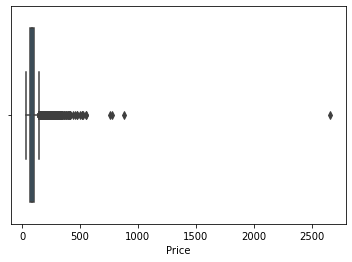

In [16]:
sns.boxplot(df_with_cleaned_price.Price)

we can see that there is a book with a very high price and it differs from the range of prices. we can remove it

In [17]:
df_with_cleaned_price= df_with_cleaned_price[(df_with_cleaned_price['Price']<1000)]

In [18]:
df_with_cleaned_price.describe()

,Pages,No of Rating,Avg Rating,Added by,Liked by,Reviews,Votes,Year of nomination,Price
count,2819.000000,2.819000e+03,2819.000000,2.819000e+03,2819.00000,2819.000000,2819.000000,2819.000000,2819.000000
mean,342.111387,5.871018e+04,4.051139,1.291630e+05,0.93381,5626.091522,9304.154665,2016.454416,97.620383
std,143.602720,1.655669e+05,0.258062,2.798017e+05,0.04090,11118.629269,11899.424298,2.286823,61.191666
min,31.000000,3.700000e+01,3.150000,6.890000e+02,0.65000,8.000000,53.000000,2013.000000,32.287500
25%,268.500000,6.052500e+03,3.880000,1.982300e+04,0.91000,737.000000,1910.000000,2015.000000,70.030000
50%,336.000000,1.747500e+04,4.060000,4.927200e+04,0.94000,2086.000000,4780.000000,2016.000000,81.450000
75%,404.000000,4.938450e+04,4.230000,1.232255e+05,0.96000,5504.500000,12149.500000,2018.000000,99.147487
max,1248.000000,4.015515e+06,4.890000,5.720371e+06,1.00000,161428.000000,128543.000000,2020.000000,877.370690


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

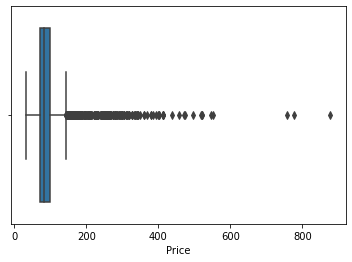

In [19]:
sns.boxplot(df_with_cleaned_price.Price)

## Visualization

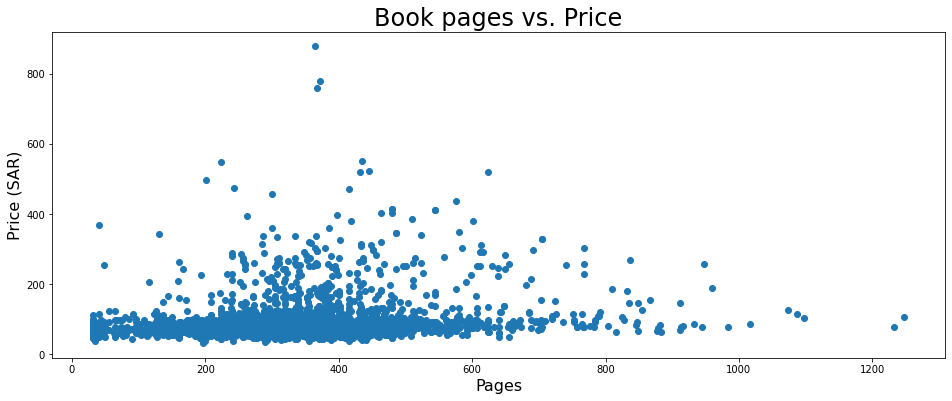

In [20]:
plt.figure(figsize=(16, 6))
plt.xlabel("Pages", size=16)
plt.ylabel("Price (SAR)", size=16)
plt.title("Book pages vs. Price", size=24)
plt.scatter(df_with_cleaned_price['Pages'],df_with_cleaned_price['Price']);

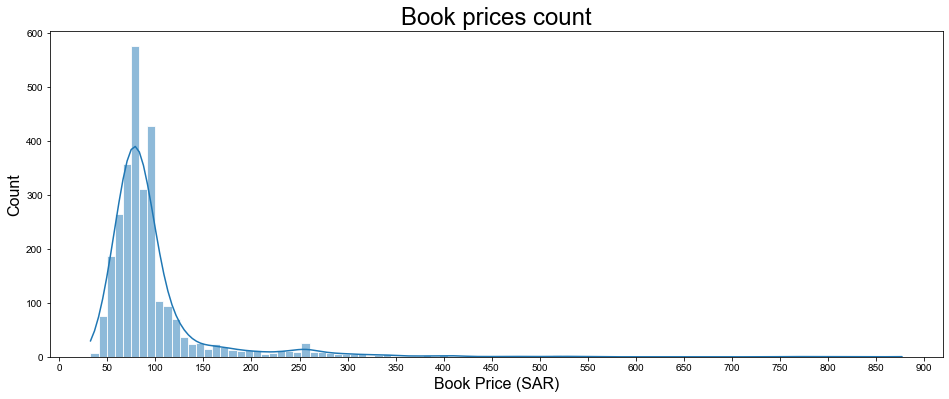

In [21]:
plt.figure(figsize=(16, 6))
plt.xlabel("Book Price (SAR)", size=16)
plt.ylabel("Count", size=16)
plt.title("Book prices count", size=24)
plt.xticks(range(0,1000,50))
sns.set_style("white")
sns.histplot(df_with_cleaned_price['Price'],bins=100, kde=True);

In [22]:
grouped_df = df_with_cleaned_price.groupby(["Genre"]).agg({'Price':np.mean}).sort_values(by = 'Price', ascending = False)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


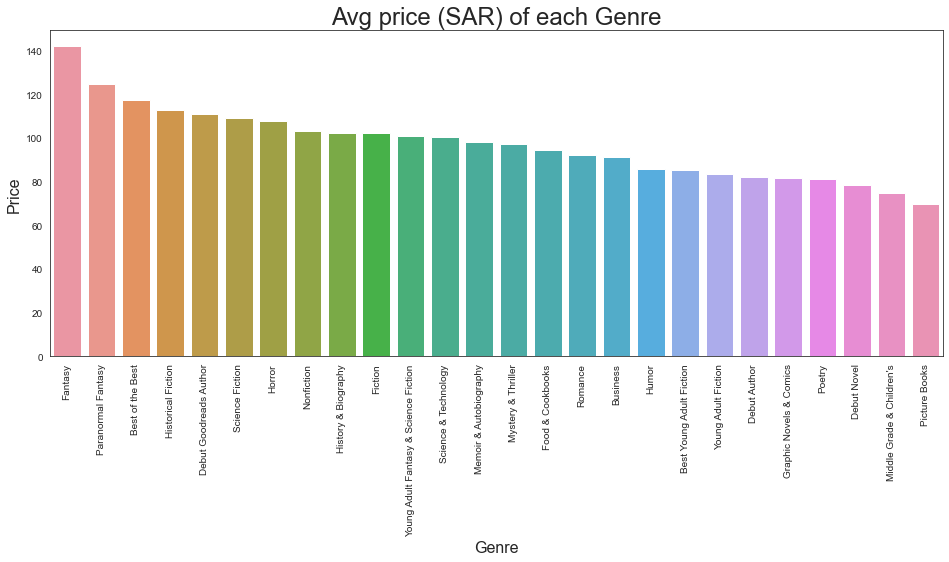

In [23]:
plt.figure(figsize=(16, 6))
plt.xlabel("Price", size=16)
plt.ylabel("Genre", size=16)
plt.title("Avg price (SAR) of each Genre", size=24)
plt.xticks(rotation=90)
sns.barplot(grouped_df.index,grouped_df['Price']);

### Encode the Genre column
why not ?

In [24]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df_with_cleaned_price['Genre'] = le.fit_transform(df_with_cleaned_price['Genre'])

In [25]:
# dropping it becasue it will not add info to the plot
pairplot_df = df_with_cleaned_price.drop(['Year of nomination','Genre'],axis = 1)

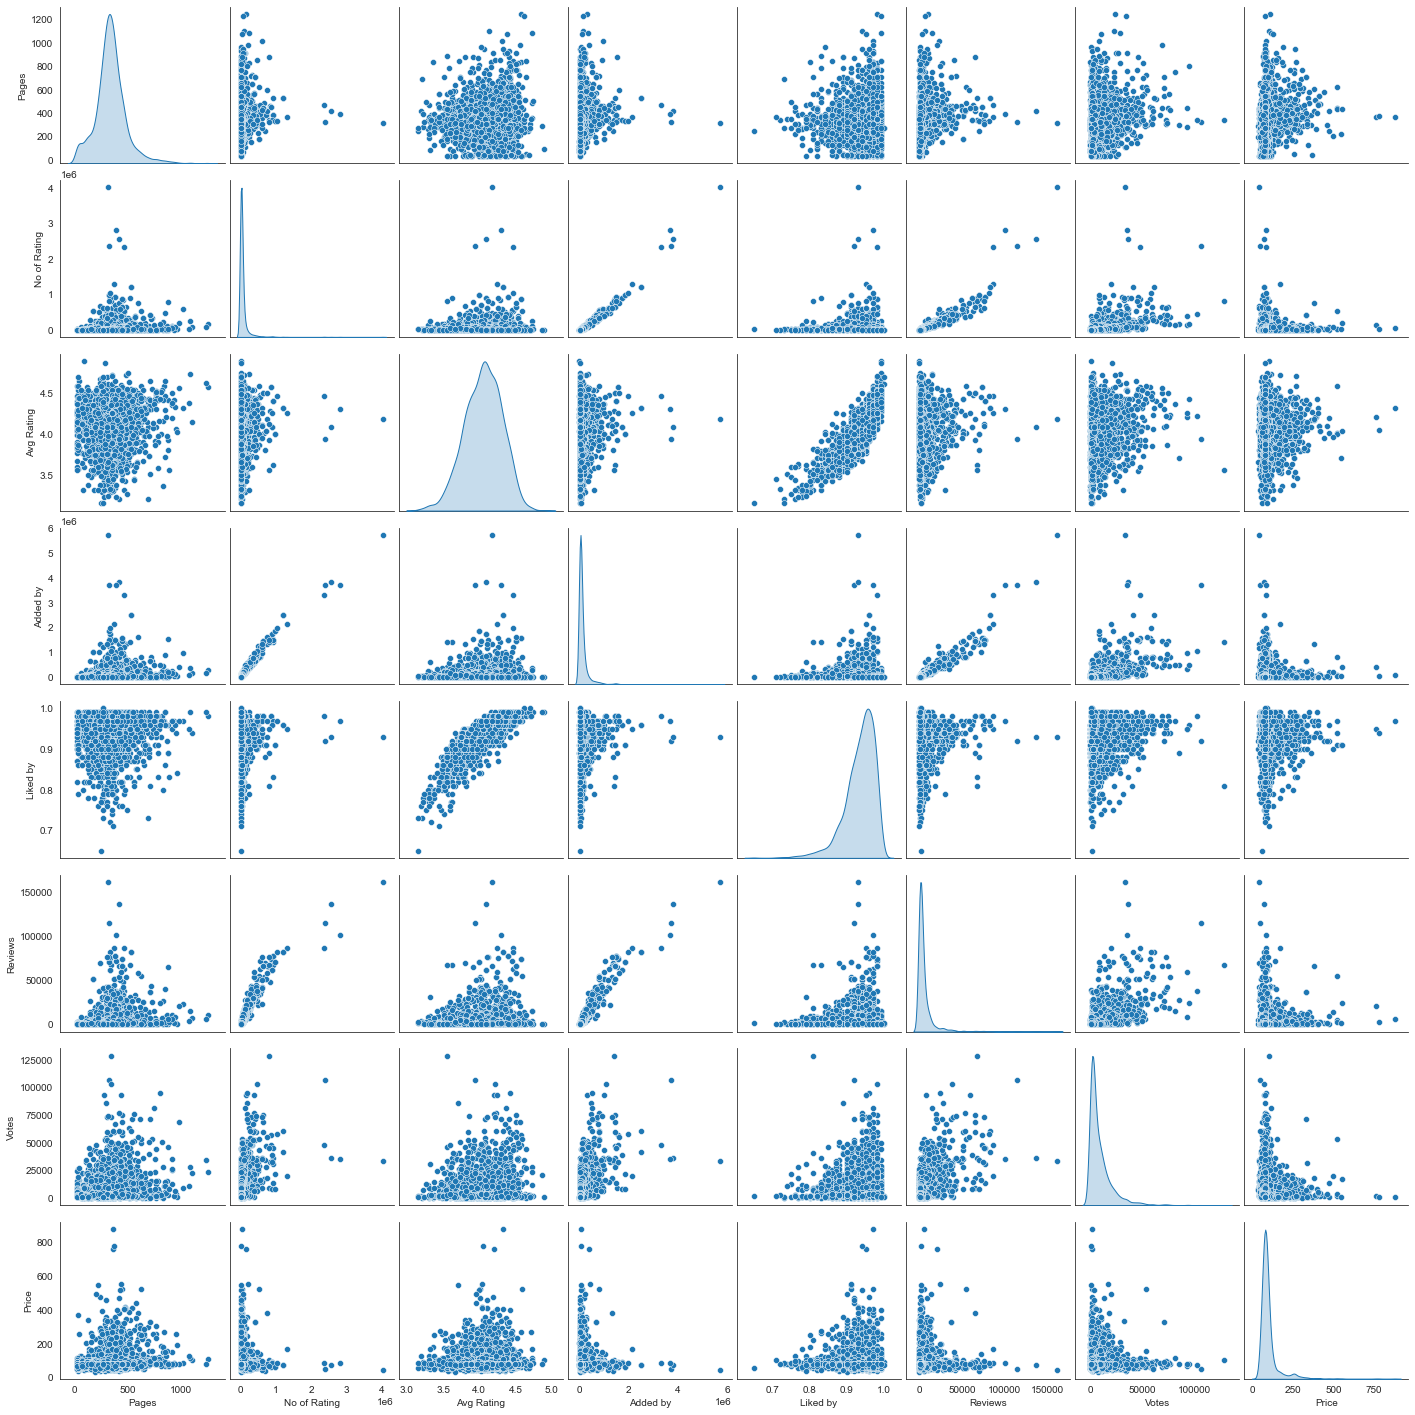

In [26]:
sns.pairplot(pairplot_df,diag_kind = 'kde')

In [27]:
df_with_cleaned_price.corr()

,Pages,No of Rating,Avg Rating,Added by,Liked by,Reviews,Votes,Genre,Year of nomination,Price
Pages,1.000000,0.123041,0.102033,0.148874,0.061880,0.160504,0.158887,-0.017192,-0.070195,0.176400
No of Rating,0.123041,1.000000,0.075437,0.978713,0.025633,0.914318,0.447861,-0.102522,-0.047370,-0.017887
Avg Rating,0.102033,0.075437,1.000000,0.069264,0.843596,0.077313,0.101261,0.053136,0.081593,0.006747
Added by,0.148874,0.978713,0.069264,1.000000,0.017830,0.956638,0.519348,-0.109100,-0.023869,-0.023609
Liked by,0.061880,0.025633,0.843596,0.017830,1.000000,0.022290,0.049305,0.066125,0.114350,0.004123
Reviews,0.160504,0.914318,0.077313,0.956638,0.022290,1.000000,0.562747,-0.094068,-0.020735,-0.012336
Votes,0.158887,0.447861,0.101261,0.519348,0.049305,0.562747,1.000000,-0.032305,0.195499,-0.066607
Genre,-0.017192,-0.102522,0.053136,-0.109100,0.066125,-0.094068,-0.032305,1.000000,0.051067,-0.054864
Year of nomination,-0.070195,-0.047370,0.081593,-0.023869,0.114350,-0.020735,0.195499,0.051067,1.000000,-0.257047
Price,0.176400,-0.017887,0.006747,-0.023609,0.004123,-0.012336,-0.066607,-0.054864,-0.257047,1.000000


<ipython-input-28-05016c5ac768>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lower_triangle = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))


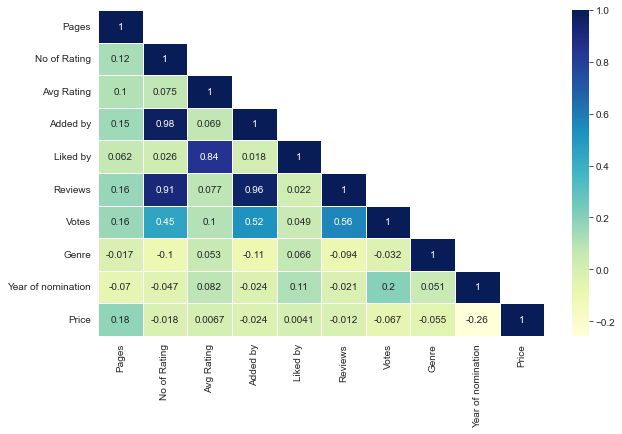

In [28]:
fig, ax = plt.subplots(figsize=(10,6)) 

corr_df = df_with_cleaned_price.corr()

lower_triangle = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

sns.heatmap(lower_triangle,annot=True,cmap="YlGnBu",linewidths=.5);

# Building the Model

In [29]:
df_LR_ = df_with_cleaned_price.copy(deep = True)
# drop the unnecessary columns 
df_LR_.drop(['Title', 'Year of nomination', 'Year', 'Author'], axis =1, inplace=True)

In [30]:
df_LR_.columns

Index(['Pages', 'No of Rating', 'Avg Rating', 'Added by', 'Liked by',
       'Reviews', 'Votes', 'Genre', 'Price'],
      dtype='object')

number of unique prices :

In [31]:
(df_LR_['Price'].unique()).shape

(1305,)

### Splitting the data to Test (25%) and Train (75%) sets 

In [32]:
X,y = df_LR_[['Pages', 'Liked by','Added by', 'Genre','Votes', 'Avg Rating','Reviews','No of Rating']], df_LR_['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42) 

### Base model : LinearRegression

In [33]:
m = LinearRegression()
m.fit(X_train,y_train)

LinearRegression()

In [34]:
m.coef_

array([ 8.22180801e-02,  1.38425513e+01, -9.38001351e-05, -5.98125826e-01,
       -4.46447509e-04, -2.80470411e+00,  1.23794452e-03,  7.47040623e-05])

In [35]:
m.intercept_

81.27003877566703

In [36]:
m.score(X_train,y_train)

0.04827086564670424

In [37]:
y_pred = m.predict(X_test)
mean_absolute_error(y_test,y_pred)

34.89233262640097

making the Liked by column more linear. we have high collinearity between avg rating and liked by since both represent popluarity, so we will multiply them

In [43]:
engineered2 = df_LR_.copy(deep = True)

In [44]:
engineered2['Liked by'] = (engineered2['Liked by']) ** 2

engineered2['Liked_Rating_prod'] = (engineered2['Liked by']) * (engineered2['Avg Rating'])

In [45]:
X,y = engineered2[['Pages','Added by','Liked_Rating_prod','Genre','Votes','Reviews','No of Rating']], engineered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42) 

In [46]:
m = LinearRegression()
m.fit(X_train,y_train)

LinearRegression()

In [83]:
Mean_R2_Linear_CV = np.mean(cross_val_score(m, X_train, y_train, cv=kf, scoring='r2'))
Mean_R2_Linear_CV 

0.03897986337296633

In [90]:
Mean_R2_Linear_CV = -np.mean(cross_val_score(m, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error'))
Mean_R2_Linear_CV

32.74596001537384

In [84]:
y_pred = m.predict(X_test)
mean_absolute_error(y_pred,y_test)

34.8709118280816

# Model Regularization 

### Standardization

In [49]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)
## Scaling x values for lasso,ridge,elastic net

In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state = 22)

## Lasso

In [65]:
alphas = np.linspace(0.01,10,100)

hyper_param = {'alpha':alphas}

model = Lasso()

model_cv_Lasso = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        cv=kf,
                        verbose=1,
                        return_train_score=True)

model_cv_Lasso.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.389e+02, tolerance: 5.605e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+04, tolerance: 6.429e+02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=KFold(n_splits=5, random_state=22, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ])},
             re

In [66]:
 model_cv_Lasso.best_estimator_.alpha

2.835454545454545

In [67]:
best_model_lasso = Lasso(model_cv_Lasso.best_estimator_.alpha)
best_model_lasso.fit(X_train,y_train)
list(zip(X_train.columns, best_model_lasso.coef_))

[('Pages', 0.0817948463370329),
 ('Added by', -9.226577671640614e-05),
 ('Liked_Rating_prod', -0.0),
 ('Genre', -0.5282311109776647),
 ('Votes', -0.00045090956859438933),
 ('Reviews', 0.001225877346778782),
 ('No of Rating', 7.305049011940135e-05)]

In [91]:
Mean_R2_Lasso_CV = np.mean(cross_val_score(best_model_lasso, X_train, y_train ,cv=kf, scoring='r2'))
Mean_R2_Lasso_CV

0.039714167488164184

In [92]:
Mean_R2_Lasso_CV = -np.mean(cross_val_score(best_model_lasso, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error'))
Mean_R2_Lasso_CV

32.74369824035604

In [72]:
y_pred = best_model_lasso.predict(X_test)
mean_absolute_error(y_pred,y_test)

34.87261534299201

## Ridge

In [73]:
alphas = np.linspace(0.01,10,100)

hyper_param = {'alpha':alphas}

model = Ridge()

model_cv_ridge = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        cv=kf,
                        verbose=1,
                        return_train_score=True)

model_cv_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=22, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ])},
             re

In [74]:
 model_cv_ridge.best_estimator_.alpha

10.0

In [75]:
best_model_ridge = Ridge(model_cv_ridge.best_estimator_.alpha)
best_model_ridge.fit(X_train,y_train)
list(zip(X_train.columns, best_model_ridge.coef_))

[('Pages', 0.08224689947708207),
 ('Added by', -9.423078766119686e-05),
 ('Liked_Rating_prod', -0.8623252756853158),
 ('Genre', -0.5949251745584588),
 ('Votes', -0.00044563443932524506),
 ('Reviews', 0.0012387849358921163),
 ('No of Rating', 7.522779412175862e-05)]

In [76]:
Mean_R2_Ridge_CV = np.mean(cross_val_score(best_model_ridge, X_train, y_train ,cv=kf, scoring='r2'))
Mean_R2_Ridge_CV

0.0389998939434306

In [93]:
Mean_R2_Ridge_CV = -np.mean(cross_val_score(best_model_ridge, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error'))
Mean_R2_Ridge_CV

32.74574491043272

In [94]:
y_pred = best_model_ridge.predict(X_test)
mean_absolute_error(y_pred,y_test)

34.87125952314097

## ElasticNet

In [78]:
params = {"alpha": np.linspace(0.01,10,100)}
model = GridSearchCV(ElasticNet(), params, cv=kf )
model.fit(X_train,y_train)
model.best_estimator_.alpha

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+03, tolerance: 5.605e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.249e+04, tolerance: 6.429e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

5.257272727272727

In [79]:
best_model_en = ElasticNet(model.best_estimator_.alpha)
best_model_en.fit(X_train,y_train)
list(zip(X_train.columns, best_model_en.coef_))

[('Pages', 0.0817936779713975),
 ('Added by', -9.19325023707776e-05),
 ('Liked_Rating_prod', -0.0),
 ('Genre', -0.5007153835557179),
 ('Votes', -0.00045161843663706113),
 ('Reviews', 0.0012234813073021178),
 ('No of Rating', 7.27554845021614e-05)]

In [80]:
Mean_R2_EN_CV = np.mean(cross_val_score(best_model_en, X_train, y_train ,cv=kf, scoring='r2'))
Mean_R2_EN_CV

0.03976920633762156

In [95]:
Mean_R2_EN_CV = -np.mean(cross_val_score(best_model_en, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error'))
Mean_R2_EN_CV

32.74447444223531

In [81]:
y_pred = best_model_en.predict(X_test)
mean_absolute_error(y_pred,y_test)

34.866851096917486

## Polynomial Regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_test_poly = poly.transform(X_test)

# Fit a model using polynomial features
lr_poly = LinearRegression()

lr_poly.fit(X_train_poly,y_train)

y_pred = lr_poly.predict(X_test_poly)

mean_absolute_error(y_pred,y_test)


36.356765988115576

In [88]:
poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
Mean_R2_Poly_CV = np.mean(cross_val_score(poly, X_train, y_train, cv=kf, scoring='r2'))
Mean_R2_Poly_CV 

-0.04369661727008389

In [96]:
Mean_R2_Poly_CV = np.mean(cross_val_score(poly, X_train, y_train, cv=kf,scoring='neg_mean_absolute_error'))
Mean_R2_Poly_CV 

-33.88505533300811